In [1]:
import pandas as pd

# Set the display option to show the full content of a column
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('PBP2324.csv')
df

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956318,401589460,2024-02-17,Le Moyne,Stonehill,320,2,0:10,10,10,Isaiah Salter Turnover.,home,75,67,8,3,False,False,0.999897,0.999854,3,-5,9.5,138.5,John Barley/Jeff Adams/Mamadou Ba,"Syracuse, NY",Ted Grant Court,957,NaN,NaN,NaN,NaN,NaN,Le Moyne,Stonehill
1956319,401589460,2024-02-17,Le Moyne,Stonehill,321,2,0:10,10,10,Stonehill Timeout,away,75,67,8,0,False,False,0.999897,0.999854,2,-5,9.5,138.5,John Barley/Jeff Adams/Mamadou Ba,"Syracuse, NY",Ted Grant Court,957,NaN,NaN,NaN,NaN,NaN,Stonehill,Stonehill
1956320,401589460,2024-02-17,Le Moyne,Stonehill,322,2,0:08,8,8,Louie Semona missed Three Point Jumper.,away,75,67,8,2,False,False,0.999907,0.999870,2,-5,9.5,138.5,John Barley/Jeff Adams/Mamadou Ba,"Syracuse, NY",Ted Grant Court,957,Stonehill,missed,Louie Semona,True,False,Stonehill,Le Moyne
1956321,401589460,2024-02-17,Le Moyne,Stonehill,323,2,0:03,3,3,Luke Sutherland Defensive Rebound.,home,75,67,8,5,False,False,0.999930,0.999902,2,-5,9.5,138.5,John Barley/Jeff Adams/Mamadou Ba,"Syracuse, NY",Ted Grant Court,957,NaN,NaN,NaN,NaN,NaN,Stonehill,Le Moyne


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956323 entries, 0 to 1956322
Data columns (total 34 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   game_id                  int64  
 1   date                     object 
 2   home                     object 
 3   away                     object 
 4   play_id                  int64  
 5   half                     int64  
 6   time_remaining_half      object 
 7   secs_remaining           int64  
 8   secs_remaining_absolute  int64  
 9   description              object 
 10  action_team              object 
 11  home_score               int64  
 12  away_score               int64  
 13  score_diff               int64  
 14  play_length              int64  
 15  scoring_play             bool   
 16  foul                     bool   
 17  win_prob                 float64
 18  naive_win_prob           float64
 19  home_time_out_remaining  int64  
 20  away_time_out_remaining  int64  
 21  home_fav

In [4]:
df.isnull().sum()

game_id                          0
date                             0
home                             0
away                             0
play_id                          0
half                             0
time_remaining_half              0
secs_remaining                   0
secs_remaining_absolute          0
description                   1717
action_team                  65860
home_score                       0
away_score                       0
score_diff                       0
play_length                      0
scoring_play                     0
foul                             0
win_prob                         1
naive_win_prob                   1
home_time_out_remaining          0
away_time_out_remaining          0
home_favored_by             239165
total_line                  298671
referees                     49708
arena_location                   0
arena                            0
attendance                       0
shot_team                  1082158
shot_outcome        

In [5]:
# Drop irrelevant columns based on the analysis goal
irrelevant_columns = [
    'game_id', 'arena_location', 'arena', 'attendance', 
    'referees', 'home_favored_by', 'total_line'
]

# Drop these columns from the DataFrame
df = df.drop(columns=irrelevant_columns)




In [6]:
df.isnull().sum()

date                             0
home                             0
away                             0
play_id                          0
half                             0
time_remaining_half              0
secs_remaining                   0
secs_remaining_absolute          0
description                   1717
action_team                  65860
home_score                       0
away_score                       0
score_diff                       0
play_length                      0
scoring_play                     0
foul                             0
win_prob                         1
naive_win_prob                   1
home_time_out_remaining          0
away_time_out_remaining          0
shot_team                  1082158
shot_outcome               1024206
shooter                    1024206
three_pt                   1024206
free_throw                 1024206
possession_before           122164
possession_after            221468
dtype: int64

In [7]:
df = df.dropna(subset=['shot_team', 'shot_outcome', 'shooter', 'three_pt', 'free_throw'])


In [8]:
df.isnull().sum()

date                           0
home                           0
away                           0
play_id                        0
half                           0
time_remaining_half            0
secs_remaining                 0
secs_remaining_absolute        0
description                    0
action_team                    0
home_score                     0
away_score                     0
score_diff                     0
play_length                    0
scoring_play                   0
foul                           0
win_prob                       0
naive_win_prob                 0
home_time_out_remaining        0
away_time_out_remaining        0
shot_team                      0
shot_outcome                   0
shooter                        0
three_pt                       0
free_throw                     0
possession_before              0
possession_after           41368
dtype: int64

In [9]:
df

,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after
0,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC
2,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist
7,2023-11-07,Texas A&M-CC,SW Adventist,8,1,18:45,2325,2325,Marcel Phifer missed Three Point Jumper.,away,3,0,3,7,False,False,0.568216,0.568216,6,6,SW Adventist,missed,Marcel Phifer,True,False,SW Adventist,Texas A&M-CC
9,2023-11-07,Texas A&M-CC,SW Adventist,10,1,18:33,2313,2313,Stephen Giwa missed Layup.,home,3,0,3,8,False,False,0.568608,0.568608,6,6,Texas A&M-CC,missed,Stephen Giwa,False,False,Texas A&M-CC,Texas A&M-CC
11,2023-11-07,Texas A&M-CC,SW Adventist,12,1,18:30,2310,2310,Garry Clark made Layup.,home,5,0,5,0,True,False,0.613242,0.613242,6,6,Texas A&M-CC,made,Garry Clark,False,False,Texas A&M-CC,SW Adventist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956311,2024-02-17,Le Moyne,Stonehill,313,2,0:23,23,23,Louie Semona missed Three Point Jumper.,away,74,65,9,10,False,False,0.999926,0.999893,3,-5,Stonehill,missed,Louie Semona,True,False,Stonehill,Le Moyne
1956314,2024-02-17,Le Moyne,Stonehill,316,2,0:18,18,18,Luke Sutherland missed Free Throw.,home,74,65,9,0,False,False,0.999945,0.999921,3,-5,Le Moyne,missed,Luke Sutherland,False,True,Le Moyne,Le Moyne
1956316,2024-02-17,Le Moyne,Stonehill,318,2,0:18,18,18,Luke Sutherland made Free Throw.,home,75,65,10,0,True,False,0.999981,0.999972,3,-5,Le Moyne,made,Luke Sutherland,False,True,Le Moyne,Stonehill
1956317,2024-02-17,Le Moyne,Stonehill,319,2,0:13,13,13,Tony Felder made Jumper.,away,75,67,8,5,True,False,0.999879,0.999827,3,-5,Stonehill,made,Tony Felder,False,False,Stonehill,Le Moyne


In [10]:
def game_phase(secs):
    if secs > 1200:  # assuming 2400 seconds total in a game, adjust based on league rules
        return 'early'
    elif secs > 600:
        return 'mid'
    else:
        return 'late'

df['game_phase'] = df['secs_remaining_absolute'].apply(game_phase)


In [11]:
df['score_context'] = df['score_diff'].apply(lambda x: 'leading' if x > 0 else ('tied' if x == 0 else 'trailing'))


In [12]:
df['shot_success'] = df['shot_outcome'].apply(lambda x: 1 if x == 'made' else 0)


In [ ]:
df

,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after,game_phase,score_context,shot_success
0,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC,early,tied,0
2,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist,early,leading,1
7,2023-11-07,Texas A&M-CC,SW Adventist,8,1,18:45,2325,2325,Marcel Phifer missed Three Point Jumper.,away,3,0,3,7,False,False,0.568216,0.568216,6,6,SW Adventist,missed,Marcel Phifer,True,False,SW Adventist,Texas A&M-CC,early,leading,0
9,2023-11-07,Texas A&M-CC,SW Adventist,10,1,18:33,2313,2313,Stephen Giwa missed Layup.,home,3,0,3,8,False,False,0.568608,0.568608,6,6,Texas A&M-CC,missed,Stephen Giwa,False,False,Texas A&M-CC,Texas A&M-CC,early,leading,0
11,2023-11-07,Texas A&M-CC,SW Adventist,12,1,18:30,2310,2310,Garry Clark made Layup.,home,5,0,5,0,True,False,0.613242,0.613242,6,6,Texas A&M-CC,made,Garry Clark,False,False,Texas A&M-CC,SW Adventist,early,leading,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956311,2024-02-17,Le Moyne,Stonehill,313,2,0:23,23,23,Louie Semona missed Three Point Jumper.,away,74,65,9,10,False,False,0.999926,0.999893,3,-5,Stonehill,missed,Louie Semona,True,False,Stonehill,Le Moyne,late,leading,0
1956314,2024-02-17,Le Moyne,Stonehill,316,2,0:18,18,18,Luke Sutherland missed Free Throw.,home,74,65,9,0,False,False,0.999945,0.999921,3,-5,Le Moyne,missed,Luke Sutherland,False,True,Le Moyne,Le Moyne,late,leading,0
1956316,2024-02-17,Le Moyne,Stonehill,318,2,0:18,18,18,Luke Sutherland made Free Throw.,home,75,65,10,0,True,False,0.999981,0.999972,3,-5,Le Moyne,made,Luke Sutherland,False,True,Le Moyne,Stonehill,late,leading,1
1956317,2024-02-17,Le Moyne,Stonehill,319,2,0:13,13,13,Tony Felder made Jumper.,away,75,67,8,5,True,False,0.999879,0.999827,3,-5,Stonehill,made,Tony Felder,False,False,Stonehill,Le Moyne,late,leading,1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Shot Success Rate by Game Phase:
 game_phase
early    0.485341
late     0.543850
mid      0.512796
Name: shot_success, dtype: float64


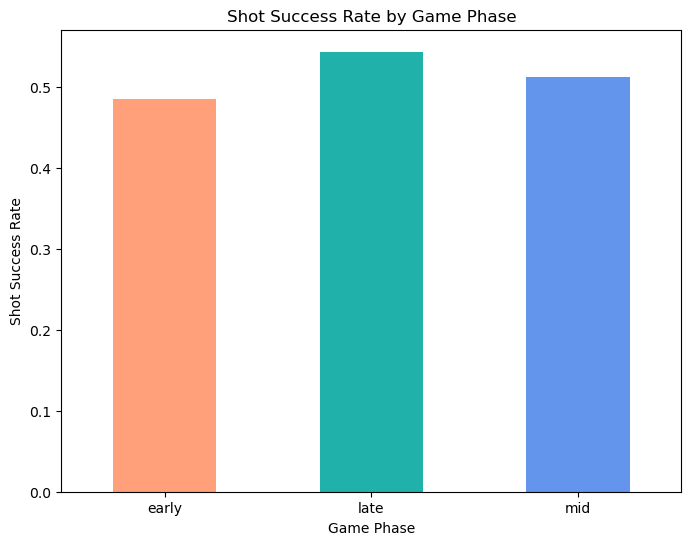

In [24]:
# Calculate shot success by game phase
game_phase_success = df.groupby('game_phase')['shot_success'].mean()
print("Shot Success Rate by Game Phase:\n", game_phase_success)

# Plot shot success rate by game phase
plt.figure(figsize=(8, 6))
game_phase_success.plot(kind='bar', color=['#FFA07A', '#20B2AA', '#6495ED'])
plt.title('Shot Success Rate by Game Phase')
plt.xlabel('Game Phase')
plt.ylabel('Shot Success Rate')
plt.xticks(rotation=0)
plt.show()


In [29]:
# Filter for high-pressure situations (late game phase and tied or trailing score context)
clutch_df = df[(df['game_phase'] == 'late') & (df['score_context'].isin(['trailing', 'tied']))]


In [61]:
# Filter clutch data for Syracuse
team_df = clutch_df[clutch_df['shot_team'] == 'Syracuse']

# Check if data is available for Syracuse in clutch situations
if team_df.empty:
    print("No clutch data available for Syracuse.")
else:
    print("Analyzing clutch performance for Syracuse...")



Analyzing clutch performance for Syracuse...


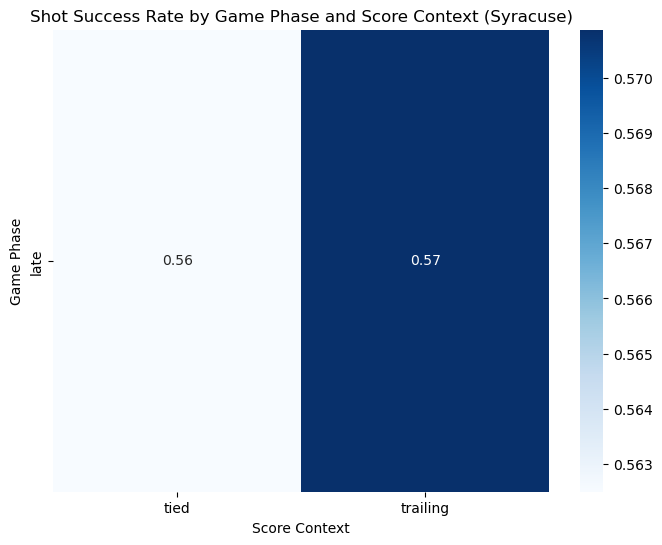

In [67]:
# Calculate shot success rate by game phase and score context for Syracuse players
phase_context_success = team_df.groupby(['game_phase', 'score_context'])['shot_success'].mean().unstack()

# Visualize with a heatmap to show performance in different contexts
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(phase_context_success, annot=True, cmap='Blues', fmt=".2f")
plt.title('Shot Success Rate by Game Phase and Score Context (Syracuse)')
plt.xlabel('Score Context')
plt.ylabel('Game Phase')
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\4045415146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['win_prob_change'] = team_df['win_prob'].diff().fillna(0)  # Fill NaN with 0 for first value


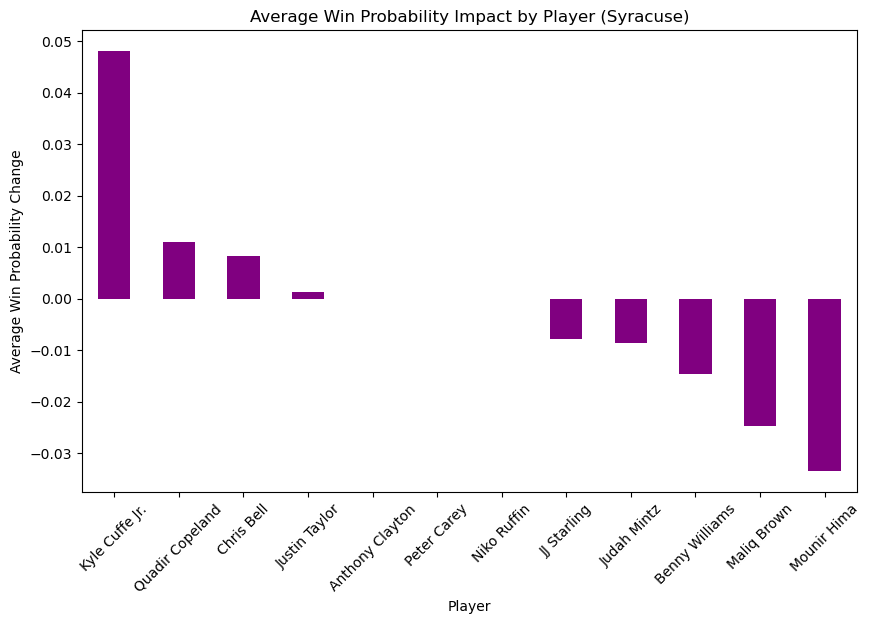

In [68]:
# Calculate win probability change for each Syracuse player in clutch situations
team_df['win_prob_change'] = team_df['win_prob'].diff().fillna(0)  # Fill NaN with 0 for first value
win_prob_impact = team_df.groupby('shooter')['win_prob_change'].mean().sort_values(ascending=False)

# Plot to show which players have the highest impact on win probability
plt.figure(figsize=(10, 6))
win_prob_impact.plot(kind='bar', color='purple')
plt.title('Average Win Probability Impact by Player (Syracuse)')
plt.xlabel('Player')
plt.ylabel('Average Win Probability Change')
plt.xticks(rotation=45)
plt.show()


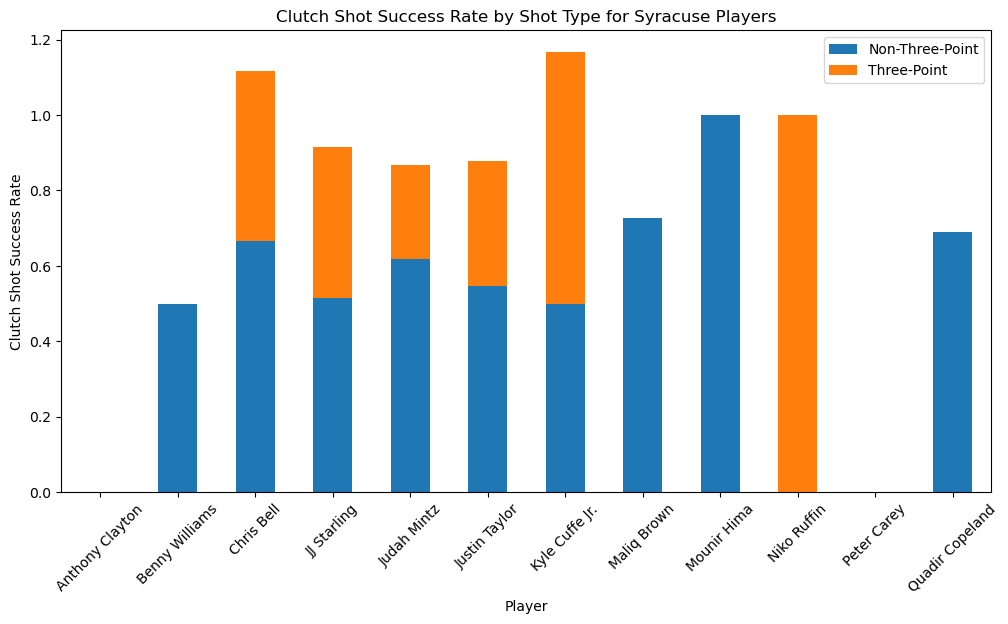

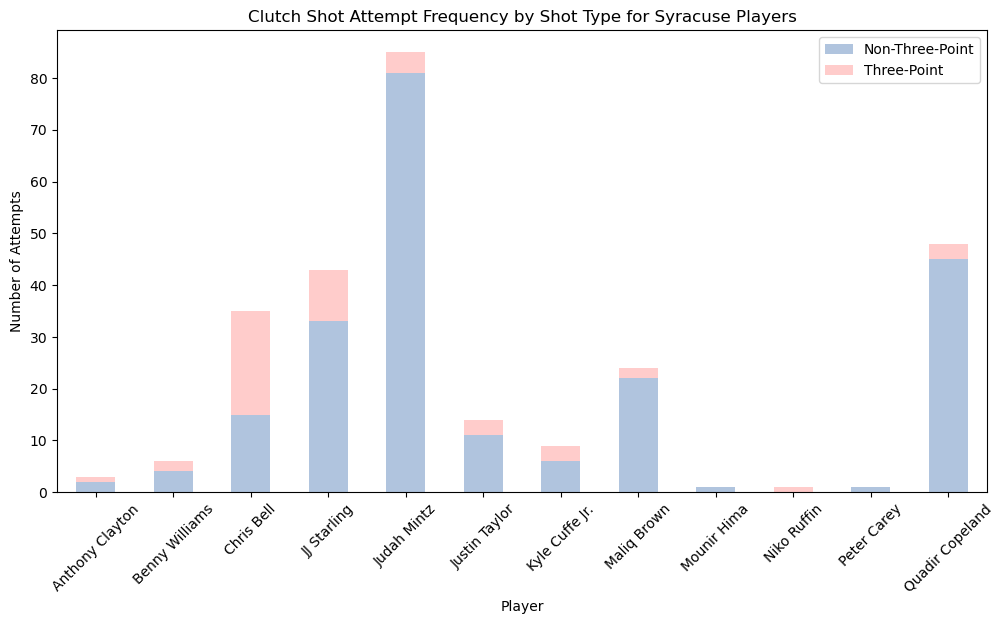

In [69]:
# Analyze shot success rate and attempt frequency by shot type (three-point vs. non-three-point) for Syracuse players
shot_type_stats = team_df.groupby(['shooter', 'three_pt'])['shot_success'].agg(['mean', 'count']).unstack()

# Plot shot success rate and frequency for each player
shot_type_stats['mean'].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Clutch Shot Success Rate by Shot Type for Syracuse Players')
plt.xlabel('Player')
plt.ylabel('Clutch Shot Success Rate')
plt.legend(['Non-Three-Point', 'Three-Point'])
plt.xticks(rotation=45)
plt.show()

# Plot attempt frequency for context
shot_type_stats['count'].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#b0c4de', '#ffcccb'])
plt.title('Clutch Shot Attempt Frequency by Shot Type for Syracuse Players')
plt.xlabel('Player')
plt.ylabel('Number of Attempts')
plt.legend(['Non-Three-Point', 'Three-Point'])
plt.xticks(rotation=45)
plt.show()


In [74]:
# Filter the dataset for Syracuse plays
syracuse_df = df[df['shot_team'] == 'Syracuse']


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time intervals (e.g., every 300 seconds = 5 minutes)
time_bins = pd.cut(syracuse_df['secs_remaining_absolute'], bins=range(0, syracuse_df['secs_remaining_absolute'].max() + 300, 300))

# Calculate shot success rate and score differential by time interval
time_performance = syracuse_df.groupby(time_bins).agg({
    'shot_success': 'mean',
    'score_diff': 'mean'
}).fillna(0)

# Reset the index to simplify plotting
time_performance.reset_index(drop=True, inplace=True)
time_performance['Time Interval (seconds)'] = range(0, syracuse_df['secs_remaining_absolute'].max(), 300)


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\2407703203.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_performance = syracuse_df.groupby(time_bins).agg({


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Syracuse plays
syracuse_df = df[df['shot_team'] == 'Syracuse']

# Define time intervals (e.g., every 300 seconds = 5 minutes)
time_bins = pd.cut(syracuse_df['secs_remaining_absolute'], bins=range(0, syracuse_df['secs_remaining_absolute'].max() + 300, 300))
syracuse_df['Time Interval'] = time_bins


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\1033154383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syracuse_df['Time Interval'] = time_bins


In [78]:
# Group by shooter and time interval, then calculate the mean shot success rate for each player
player_performance = syracuse_df.groupby(['shooter', 'Time Interval'])['shot_success'].mean().unstack().fillna(0)


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3233059685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  player_performance = syracuse_df.groupby(['shooter', 'Time Interval'])['shot_success'].mean().unstack().fillna(0)


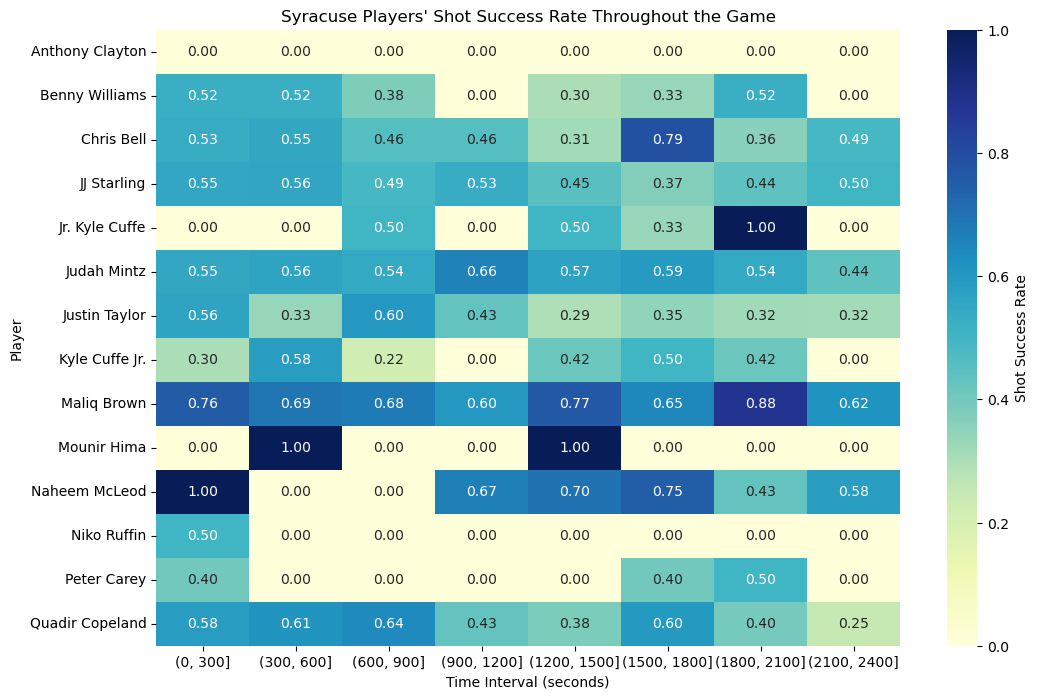

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert intervals to strings for better readability in the heatmap
time_labels = [str(interval) for interval in player_performance.columns]
player_performance.columns = time_labels  # Update the columns with string labels

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(player_performance, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Shot Success Rate'})
plt.title("Syracuse Players' Shot Success Rate Throughout the Game")
plt.xlabel("Time Interval (seconds)")
plt.ylabel("Player")
plt.show()



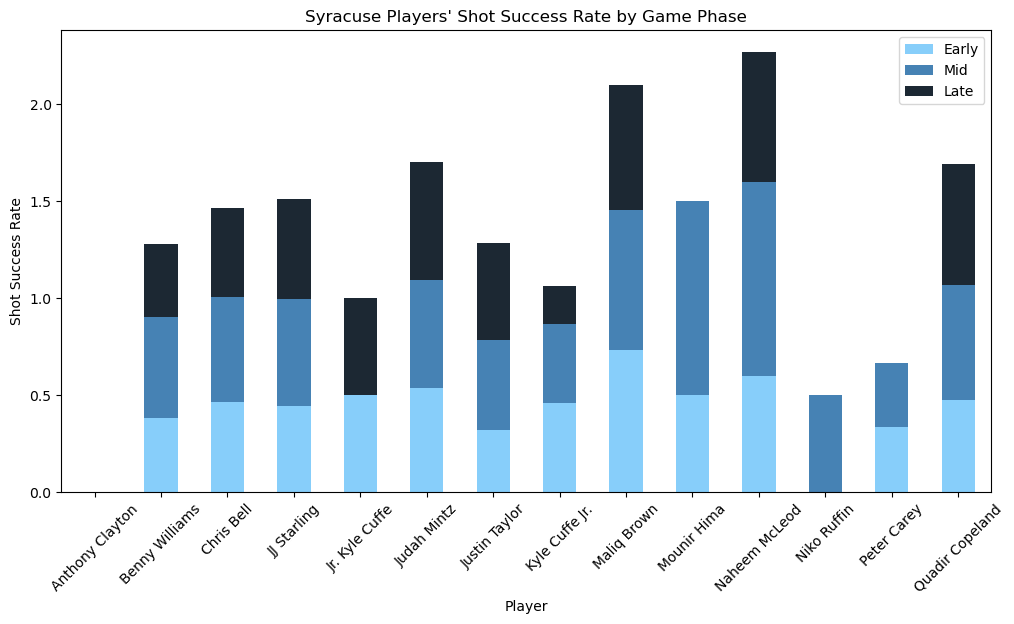

In [82]:
# Calculate shot success rate across game phases for each player
phase_success = syracuse_df.groupby(['shooter', 'game_phase'])['shot_success'].mean().unstack()

# Visualize shot success rate across game phases
phase_success.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#87CEFA', '#4682B4', '#1C2833'])
plt.title("Syracuse Players' Shot Success Rate by Game Phase")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate")
plt.xticks(rotation=45)
plt.legend(["Early", "Mid", "Late"])
plt.show()


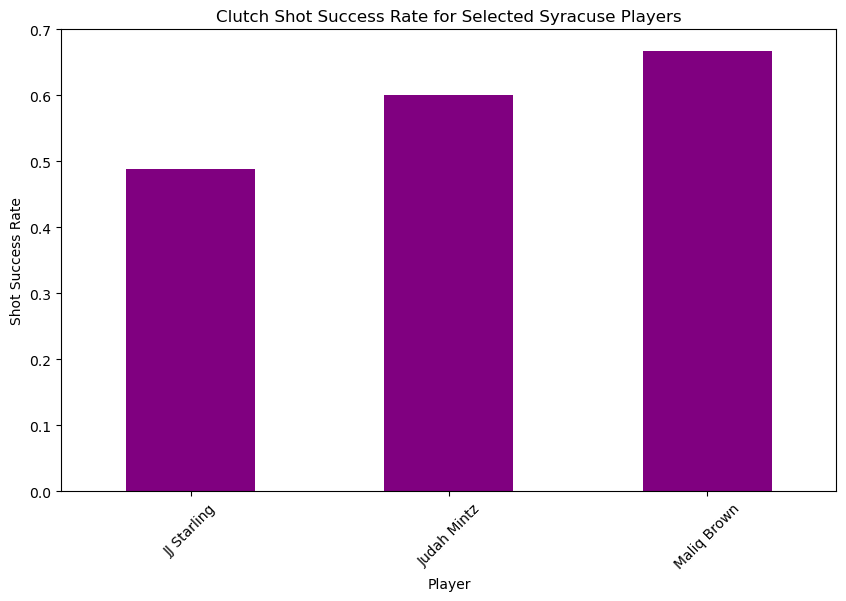

In [83]:
# Filter for clutch situations: late game phase with tied or trailing score
clutch_df = syracuse_df[(syracuse_df['game_phase'] == 'late') & (syracuse_df['score_context'].isin(['tied', 'trailing']))]

# Calculate shot success rate in clutch situations for each selected player
clutch_shot_success = clutch_df[clutch_df['shooter'].isin(['Naheem McLeod', 'Maliq Brown', 'Judah Mintz', 'JJ Starling'])].groupby('shooter')['shot_success'].mean()

# Visualize clutch shot success rate
clutch_shot_success.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Clutch Shot Success Rate for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate")
plt.xticks(rotation=45)
plt.show()


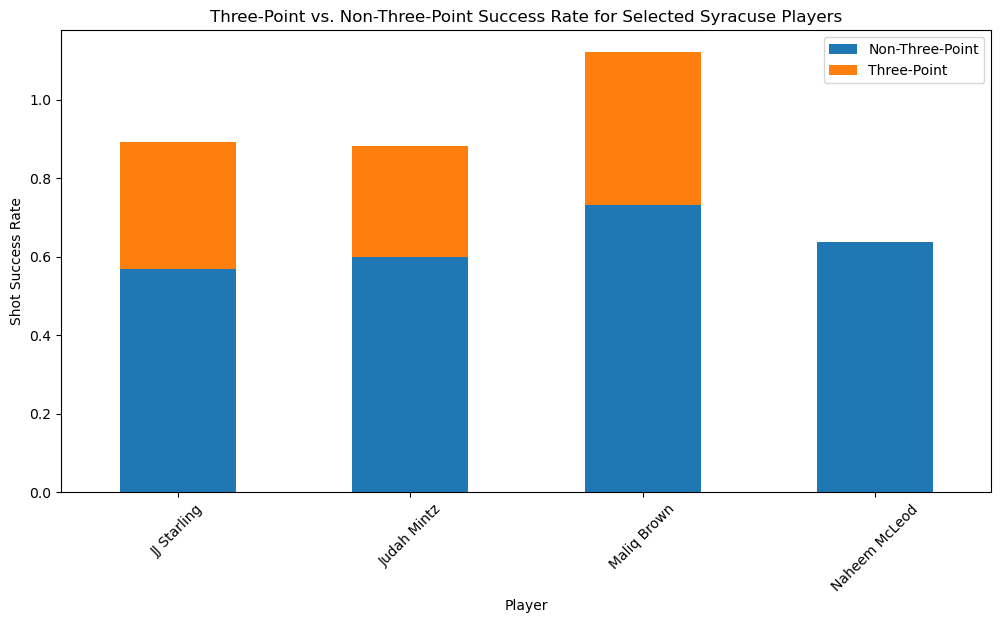

In [84]:
# Filter for the selected players
selected_players_df = syracuse_df[syracuse_df['shooter'].isin(['Naheem McLeod', 'Maliq Brown', 'Judah Mintz', 'JJ Starling'])]

# Calculate shot success rate by shot type (three-point vs. non-three-point) for each player
shot_type_success = selected_players_df.groupby(['shooter', 'three_pt'])['shot_success'].mean().unstack()

# Visualize shot success rate by shot type for each player
shot_type_success.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Three-Point vs. Non-Three-Point Success Rate for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate")
plt.xticks(rotation=45)
plt.legend(["Non-Three-Point", "Three-Point"])
plt.show()


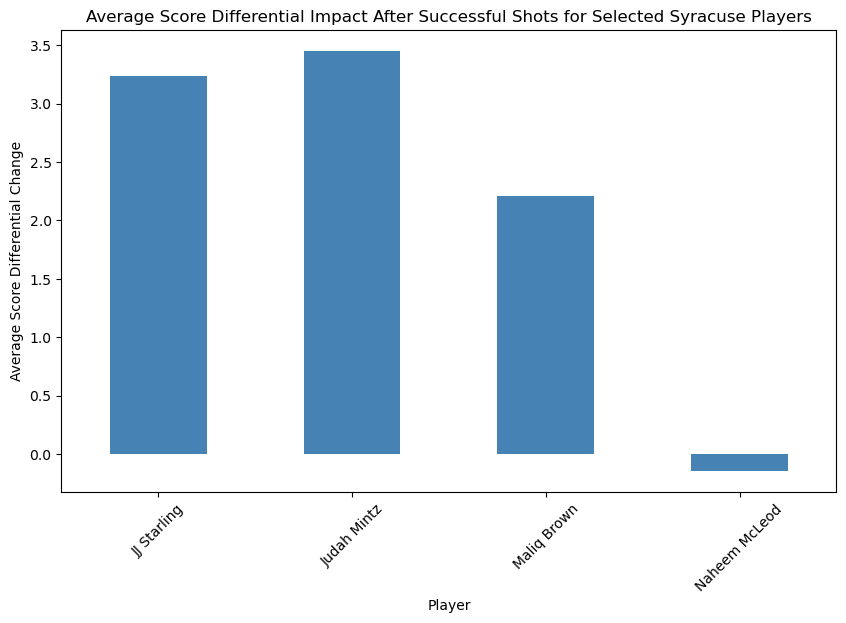

In [90]:
# Filter successful shots only
successful_shots_df = selected_players_df[selected_players_df['shot_success'] == 1].copy()

# Calculate the score differential immediately after each successful shot
successful_shots_df['next_score_diff'] = successful_shots_df.groupby('shooter')['score_diff'].shift(-1)

# Calculate the average impact on score differential for each player after a successful shot
momentum_impact = successful_shots_df.groupby('shooter')['next_score_diff'].mean()

# Visualize the momentum impact
momentum_impact.plot(kind='bar', color='steelblue', figsize=(10, 6))
plt.title("Average Score Differential Impact After Successful Shots for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Average Score Differential Change")
plt.xticks(rotation=45)
plt.show()


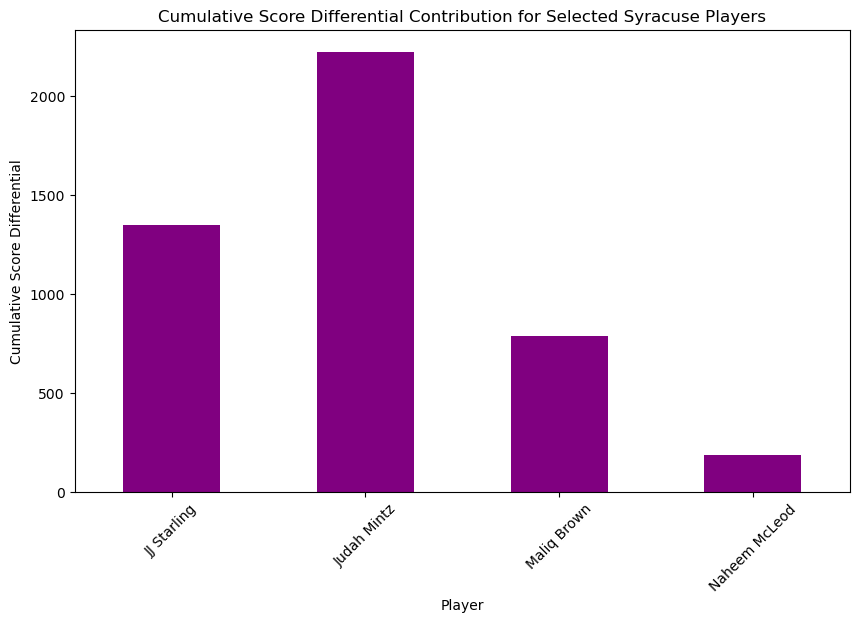

In [91]:
# Calculate cumulative score differential contribution for each player
cumulative_contribution = selected_players_df.groupby('shooter')['score_diff'].cumsum()

# Average cumulative contribution per player
average_contribution = cumulative_contribution.groupby(selected_players_df['shooter']).max()

# Visualize cumulative score differential contribution
average_contribution.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Cumulative Score Differential Contribution for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Cumulative Score Differential")
plt.xticks(rotation=45)
plt.show()


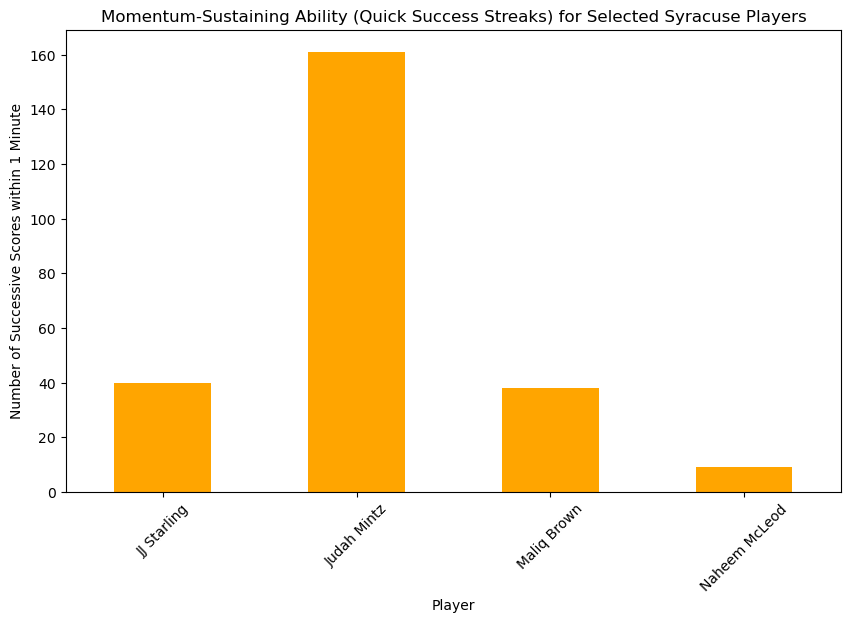

In [92]:
# Calculate time difference between consecutive successful shots
time_streak_df = successful_shots_df.copy()
time_streak_df['time_since_last_success'] = time_streak_df.groupby('shooter')['secs_remaining'].diff().abs()

# Define a threshold (e.g., 60 seconds) for sustaining momentum
threshold = 60
momentum_sustaining_ability = time_streak_df[time_streak_df['time_since_last_success'] <= threshold].groupby('shooter').size()

# Visualize momentum-sustaining ability
momentum_sustaining_ability.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Momentum-Sustaining Ability (Quick Success Streaks) for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Number of Successive Scores within 1 Minute")
plt.xticks(rotation=45)
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3473256956.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_performance = selected_players_df.groupby(['shooter', time_intervals])['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']].unstack()


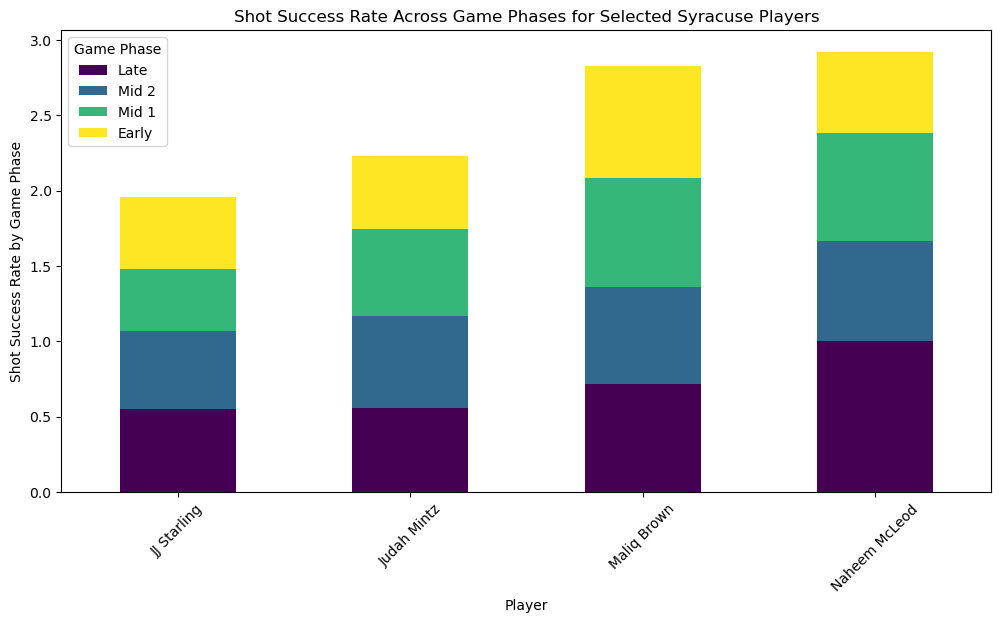

In [97]:
# Calculate shot success rate across game phases for each player
time_intervals = pd.cut(selected_players_df['secs_remaining'], bins=[0, 600, 1200, 1800, 2400], labels=['Late', 'Mid 2', 'Mid 1', 'Early'])
time_performance = selected_players_df.groupby(['shooter', time_intervals])['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']].unstack()

# Visualize shot success rate across time intervals for each player
time_performance.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Shot Success Rate Across Game Phases for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate by Game Phase")
plt.xticks(rotation=45)
plt.legend(title="Game Phase")
plt.show()


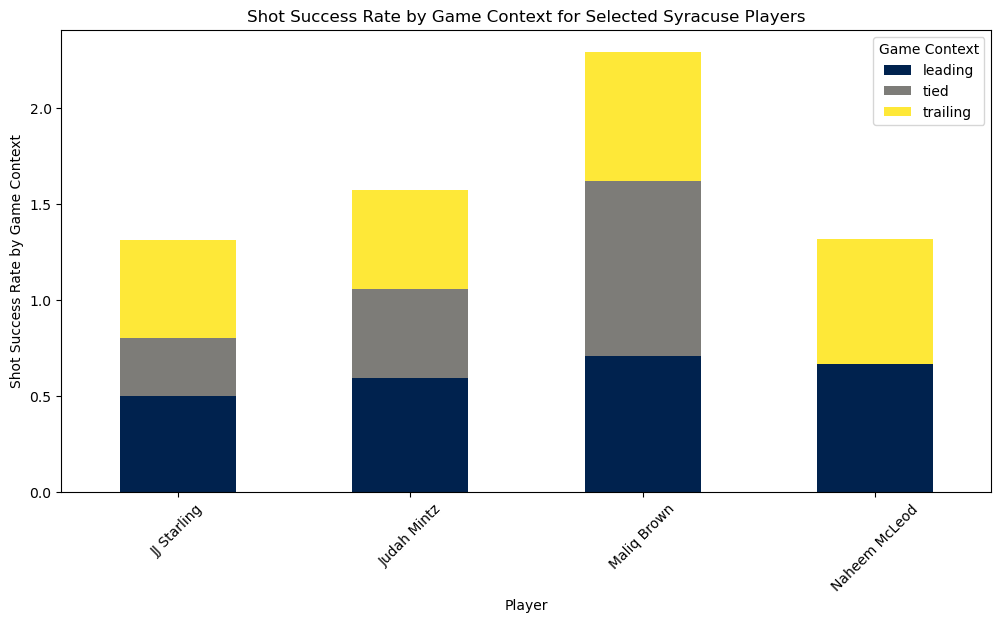

In [99]:
# Calculate shot success rate by game context (leading, tied, trailing) for each player
context_performance = selected_players_df.groupby(['shooter', 'score_context'])['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']].unstack()

# Visualize shot success rate by game context
context_performance.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='cividis')
plt.title("Shot Success Rate by Game Context for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate by Game Context")
plt.xticks(rotation=45)
plt.legend(title="Game Context")
plt.show()


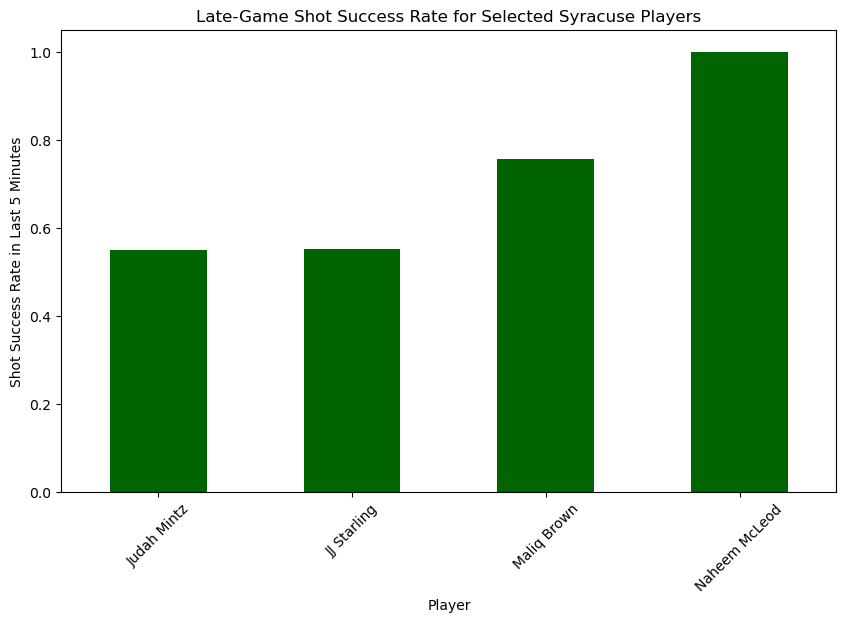

In [100]:
# Calculate shot success rate in the final phase of the game for each player
late_game_performance = selected_players_df[selected_players_df['secs_remaining'] <= 300].groupby('shooter')['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']]

# Visualize performance in late game phase
late_game_performance.plot(kind='bar', color='darkgreen', figsize=(10, 6))
plt.title("Late-Game Shot Success Rate for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate in Last 5 Minutes")
plt.xticks(rotation=45)
plt.show()


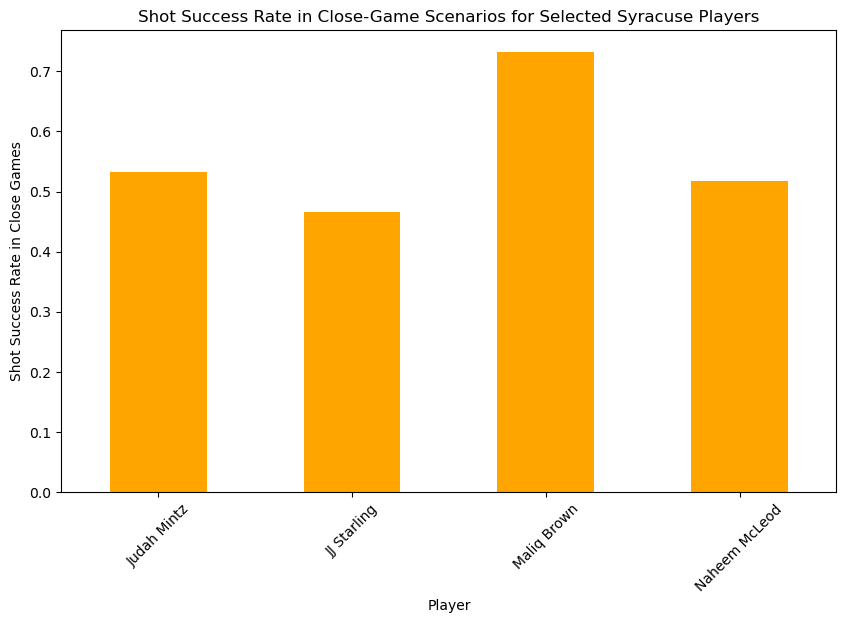

In [110]:
# Filter data for close-game scenarios (within 5 points difference)
close_game_df = selected_players_df[selected_players_df['score_diff'].abs() <= 5]

# Calculate points contribution (shot success rate) for each player in close games
close_game_contribution = close_game_df.groupby('shooter')['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']]

# Plot points contribution in close games
close_game_contribution.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Shot Success Rate in Close-Game Scenarios for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Shot Success Rate in Close Games")
plt.xticks(rotation=45)
plt.show()


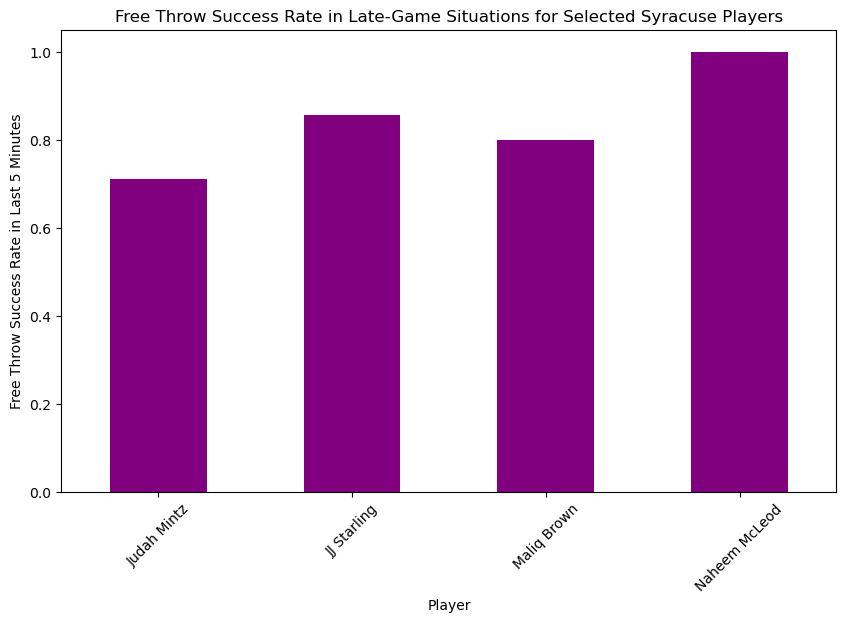

In [111]:
# Filter data for the final 5 minutes
late_game_df = selected_players_df[selected_players_df['secs_remaining'] <= 300]

# Calculate free throw success rate in the last 5 minutes for each player
free_throw_performance = late_game_df[late_game_df['free_throw'] == True].groupby('shooter')['shot_success'].mean().loc[['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']]

# Plot free throw performance in the final 5 minutes
free_throw_performance.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Free Throw Success Rate in Late-Game Situations for Selected Syracuse Players")
plt.xlabel("Player")
plt.ylabel("Free Throw Success Rate in Last 5 Minutes")
plt.xticks(rotation=45)
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3593626406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['cumulative_shot_success'] = player_df['shot_success'].expanding().mean()  # Cumulative mean for shot success rate
C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3593626406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['cumulative_shot_success'] = player_df['shot_success'].expanding().mean()  # Cumulative mean for shot success rate
C:\Users\biswa\AppData\Local\Temp\

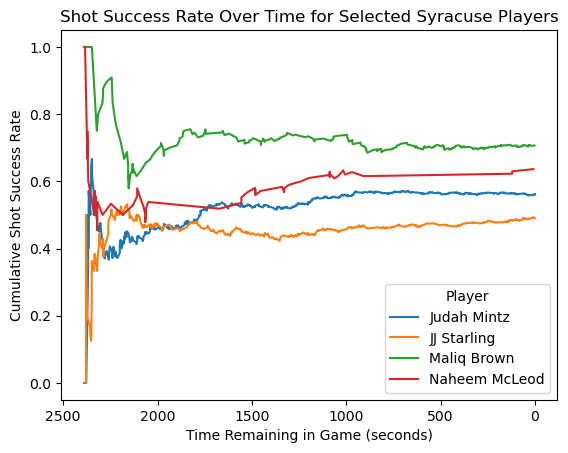

In [112]:
import matplotlib.pyplot as plt

# Assuming 'time_remaining' is a feature that gives the time in seconds remaining in the game
# Sort the dataframe by 'time_remaining' so we can see the progression of the game from start to finish
sorted_df = selected_players_df.sort_values('secs_remaining_absolute', ascending=False)

# Group by player and time interval or shot sequence, calculating the cumulative shot success rate over time
players = ['Judah Mintz', 'JJ Starling', 'Maliq Brown', 'Naheem McLeod']
for player in players:
    player_df = sorted_df[sorted_df['shooter'] == player]
    player_df['cumulative_shot_success'] = player_df['shot_success'].expanding().mean()  # Cumulative mean for shot success rate
    plt.plot(player_df['secs_remaining_absolute'], player_df['cumulative_shot_success'], label=player)

# Customize plot
plt.title("Shot Success Rate Over Time for Selected Syracuse Players")
plt.xlabel("Time Remaining in Game (seconds)")
plt.ylabel("Cumulative Shot Success Rate")
plt.legend(title="Player")
plt.gca().invert_xaxis()  # Invert x-axis to show the game progressing from start to finish
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\4244904635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_min_df['time_bin'] = time_bins
C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\4244904635.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = last_5_min_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]


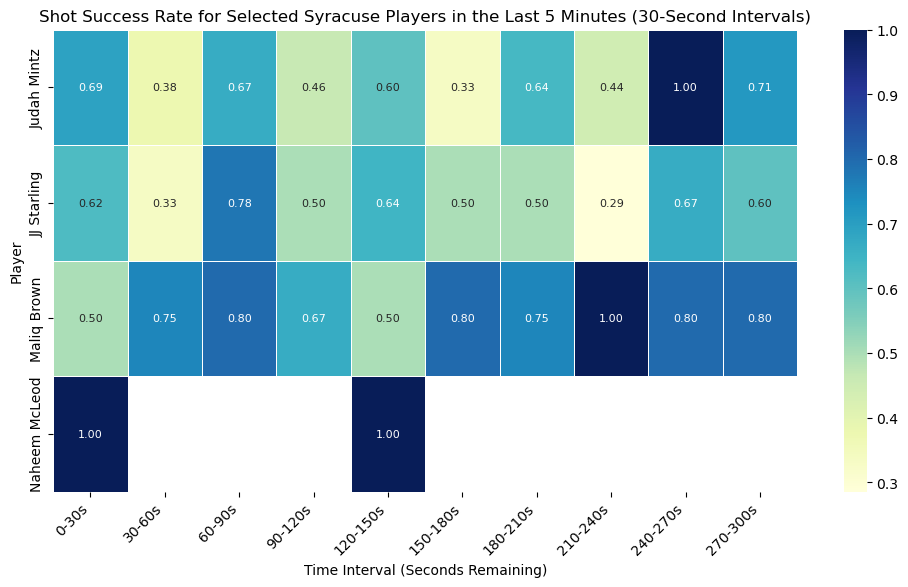

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define cleaner intervals for the last 5 minutes in 30-second bins
time_bins = pd.cut(last_5_min_df['secs_remaining_absolute'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], labels=["0-30s", "30-60s", "60-90s", "90-120s", "120-150s", "150-180s", "180-210s", "210-240s", "240-270s", "270-300s"])

# Calculate shot success rate for each player in these time bins
last_5_min_df['time_bin'] = time_bins
heatmap_data = last_5_min_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]

# Plot heatmap with improved readability settings
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Shot Success Rate for Selected Syracuse Players in the Last 5 Minutes (30-Second Intervals)")
plt.xlabel("Time Interval (Seconds Remaining)")
plt.ylabel("Player")
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\2287155808.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_game_df['time_bin'] = time_bins_early
C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\2287155808.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_early = early_game_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]


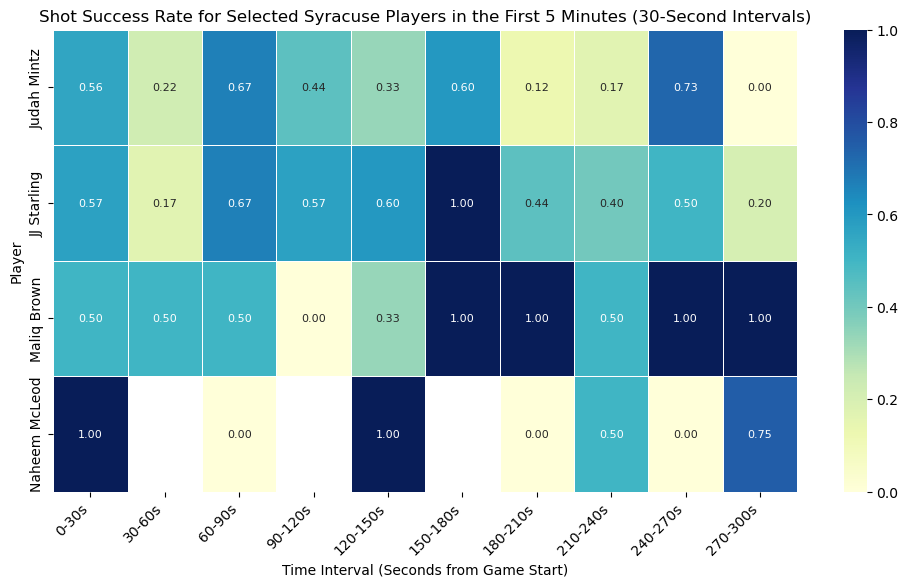

In [117]:
# Filter the dataset for the first 5 minutes of each game (first 300 seconds from game start, so the highest values in secs_remaining_absolute)
early_game_df = selected_players_df[selected_players_df['secs_remaining_absolute'] >= (2400 - 300)]  # Assuming 2400 seconds in total for a full 40-minute game

# Define intervals in ascending order for the first 5 minutes
time_bins_early = pd.cut(early_game_df['secs_remaining_absolute'], 
                         bins=[2100, 2130, 2160, 2190, 2220, 2250, 2280, 2310, 2340, 2370, 2400], 
                         labels=["0-30s", "30-60s", "60-90s", "90-120s", "120-150s", "150-180s", "180-210s", "210-240s", "240-270s", "270-300s"])

# Calculate shot success rate for each player in these time bins
early_game_df['time_bin'] = time_bins_early
heatmap_data_early = early_game_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]

# Plot heatmap with improved readability settings
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_early, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Shot Success Rate for Selected Syracuse Players in the First 5 Minutes (30-Second Intervals)")
plt.xlabel("Time Interval (Seconds from Game Start)")
plt.ylabel("Player")
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3896527393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df['time_bin'] = time_bins_first_half
C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3896527393.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_first_half = first_half_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]
C:\Users\biswa\AppData\Local\Temp\ipykernel_15492\3896527393.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

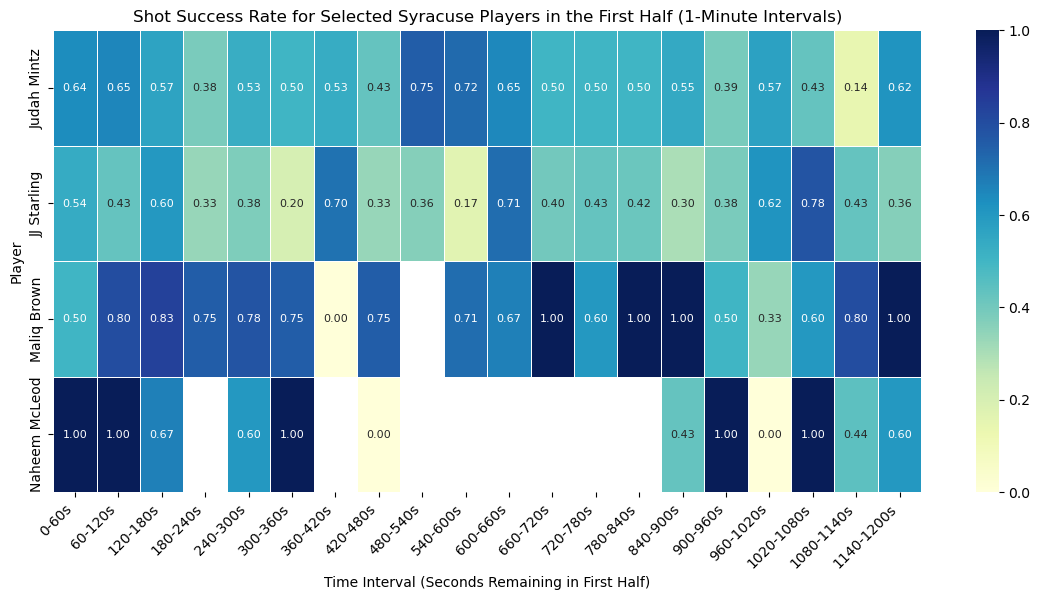

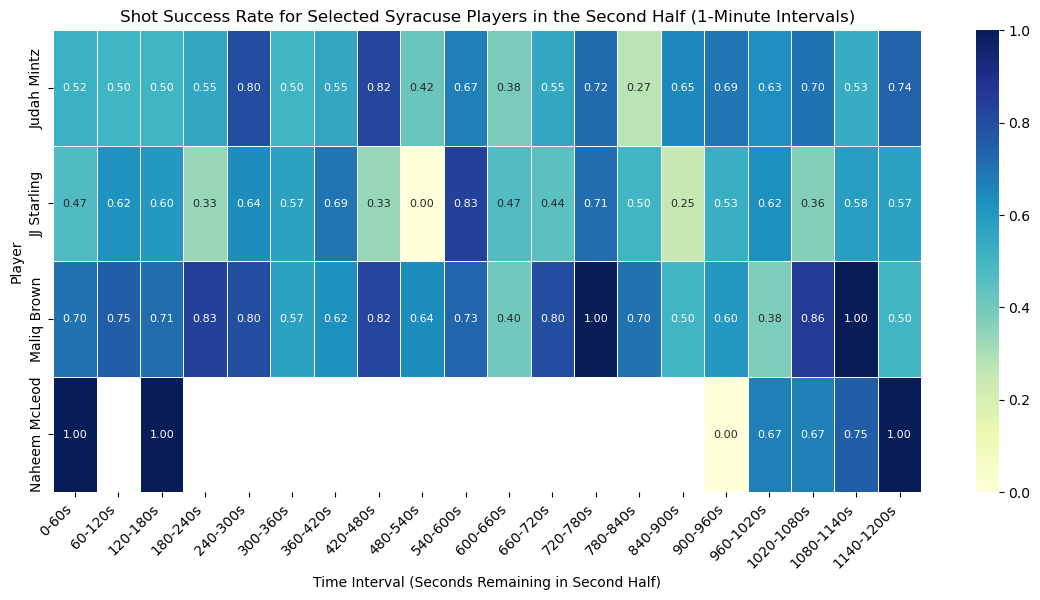

In [118]:
# Filter data for the first half (2400 to 1200 seconds remaining)
first_half_df = selected_players_df[(selected_players_df['secs_remaining_absolute'] <= 2400) & (selected_players_df['secs_remaining_absolute'] > 1200)]
# Filter data for the second half (1200 to 0 seconds remaining)
second_half_df = selected_players_df[(selected_players_df['secs_remaining_absolute'] <= 1200)]

# Define 1-minute intervals for the first half in descending order
time_bins_first_half = pd.cut(first_half_df['secs_remaining_absolute'], 
                              bins=[1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400], 
                              labels=[f"{i*60}-{(i+1)*60}s" for i in range(20)])

# Define 1-minute intervals for the second half in descending order
time_bins_second_half = pd.cut(second_half_df['secs_remaining_absolute'], 
                               bins=[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200], 
                               labels=[f"{i*60}-{(i+1)*60}s" for i in range(20)])

# Calculate shot success rate for each player in these time bins for the first half
first_half_df['time_bin'] = time_bins_first_half
heatmap_data_first_half = first_half_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]

# Calculate shot success rate for each player in these time bins for the second half
second_half_df['time_bin'] = time_bins_second_half
heatmap_data_second_half = second_half_df.pivot_table(index='shooter', columns='time_bin', values='shot_success', aggfunc='mean').loc[players]

# Plot the heatmap for the first half
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_first_half, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Shot Success Rate for Selected Syracuse Players in the First Half (1-Minute Intervals)")
plt.xlabel("Time Interval (Seconds Remaining in First Half)")
plt.ylabel("Player")
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the heatmap for the second half
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_second_half, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Shot Success Rate for Selected Syracuse Players in the Second Half (1-Minute Intervals)")
plt.xlabel("Time Interval (Seconds Remaining in Second Half)")
plt.ylabel("Player")
plt.xticks(rotation=45, ha='right')
plt.show()
